Confusion Matrix:
[[ 3  5  2  0  1  0]
 [ 2 73  4  0  2  0]
 [ 0  2 66  0  0  0]
 [ 1  6  0  7  1  0]
 [ 0  3  0  0 20  0]
 [ 0  2  1  0  0  3]]

Classification Report:
                precision    recall  f1-score   support

           DoS       0.50      0.27      0.35        11
      Exploits       0.80      0.90      0.85        81
       Fuzzers       0.90      0.97      0.94        68
       Generic       1.00      0.47      0.64        15
Reconnaissance       0.83      0.87      0.85        23
     Shellcode       1.00      0.50      0.67         6

      accuracy                           0.84       204
     macro avg       0.84      0.66      0.72       204
  weighted avg       0.84      0.84      0.83       204



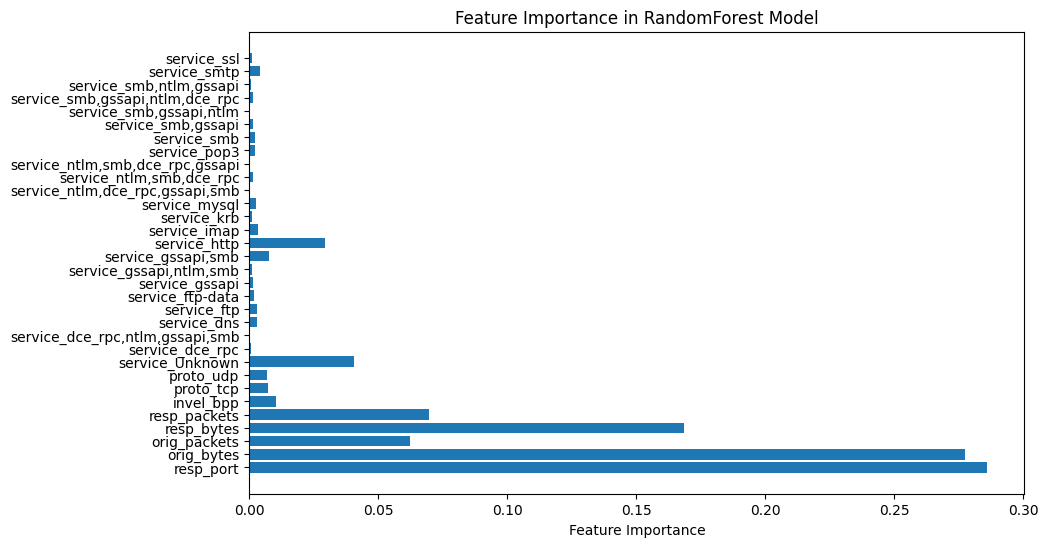

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
file_path = '/content/threats.csv'
df = pd.read_csv(file_path)

# Preprocessing
# Handle missing values
df = df.fillna('Unknown')

# Convert categorical variables to numerical
categorical_features = ['proto', 'service']
numerical_features = ['resp_port', 'orig_bytes', 'orig_packets', 'resp_bytes', 'resp_packets', 'invel_bpp']

# Separate features and target
X = df[categorical_features + numerical_features]
y = df['label']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

classifier = pipeline.named_steps['classifier']
encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_categorical_features = encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([numerical_features, encoded_categorical_features])

feature_importances = classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(all_features, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForest Model')
plt.show()


In [38]:
import pandas as pd

# Load the data from the CSV file
file_path = '/content/threats.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to inspect the data
print("Original Data:")
print(data.head())

# Check for duplicate entries
print("\nNumber of duplicate entries before removal:", data.duplicated().sum())

# Remove duplicate entries
data_cleaned = data.drop_duplicates()

# Check the number of duplicate entries after removal
print("Number of duplicate entries after removal:", data_cleaned.duplicated().sum())

# Save the cleaned data to a new CSV file
cleaned_file_path = '/content/threats_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print("\nCleaned data saved to:", cleaned_file_path)


Original Data:
        orig_ip         resp_ip  resp_port proto service     label  \
0  175.45.176.3  149.171.126.15         80   tcp    http  Exploits   
1  175.45.176.2  149.171.126.15        520   udp     NaN   Fuzzers   
2  175.45.176.0  149.171.126.18         80   tcp    http       DoS   
3  175.45.176.3  149.171.126.12         25   tcp    smtp       DoS   
4  175.45.176.1  149.171.126.15        179   tcp     NaN   Fuzzers   

   orig_bytes  orig_packets  resp_bytes  resp_packets     invel_bpp  
0       68100            58         656            16  4.100000e+01  
1          60             2           0             0  9.220000e+18  
2         774            10         908             8  1.135000e+02  
3       69568            70        1996            28  7.128571e+01  
4        1018            10         336             8  4.200000e+01  

Number of duplicate entries before removal: 98
Number of duplicate entries after removal: 0

Cleaned data saved to: /content/threats_cleaned.cs

,orig_ip,resp_ip,resp_port,proto,service,label,orig_bytes,orig_packets,resp_bytes,resp_packets,invel_bpp
0,175.45.176.3,149.171.126.15,80,tcp,http,Exploits,68100,58,656,16,4.100000e+01
2,175.45.176.0,149.171.126.18,80,tcp,http,DoS,774,10,908,8,1.135000e+02
3,175.45.176.3,149.171.126.12,25,tcp,smtp,DoS,69568,70,1996,28,7.128571e+01
7,175.45.176.1,149.171.126.13,8080,tcp,http,DoS,1766,10,256,6,4.266667e+01
9,175.45.176.0,149.171.126.16,80,tcp,http,Exploits,1406,12,3640,10,3.640000e+02
...,...,...,...,...,...,...,...,...,...,...,...
888,175.45.176.0,149.171.126.14,110,tcp,pop3,Exploits,1096,24,41018,48,8.545417e+02
890,175.45.176.2,149.171.126.14,80,tcp,http,Exploits,896,12,28200,26,1.084615e+03
891,175.45.176.2,149.171.126.12,69,udp,NaN,Exploits,1104,2,0,0,9.220000e+18
908,175.45.176.1,149.171.126.14,88,udp,krb,DoS,612,2,0,0,9.220000e+18


,orig_ip,resp_ip,resp_port,proto,service,label,orig_bytes,orig_packets,resp_bytes,resp_packets,invel_bpp
1,175.45.176.2,149.171.126.15,520,udp,NaN,Fuzzers,60,2,0,0,9.220000e+18
4,175.45.176.1,149.171.126.15,179,tcp,NaN,Fuzzers,1018,10,336,8,4.200000e+01
5,175.45.176.1,149.171.126.14,179,tcp,NaN,Fuzzers,762,14,544,10,5.440000e+01
8,175.45.176.2,149.171.126.10,445,tcp,"smb,gssapi",Fuzzers,988,12,680,8,8.500000e+01
10,175.45.176.0,149.171.126.11,514,udp,NaN,Fuzzers,1872,2,0,0,9.220000e+18
...,...,...,...,...,...,...,...,...,...,...,...
912,175.45.176.0,149.171.126.14,514,udp,NaN,Fuzzers,2054,2,0,0,9.220000e+18
913,175.45.176.3,149.171.126.14,514,udp,NaN,Fuzzers,1780,2,0,0,9.220000e+18
915,175.45.176.3,149.171.126.11,520,udp,NaN,Fuzzers,64,2,0,0,9.220000e+18
916,175.45.176.2,149.171.126.19,514,udp,NaN,Fuzzers,172,2,0,0,9.220000e+18


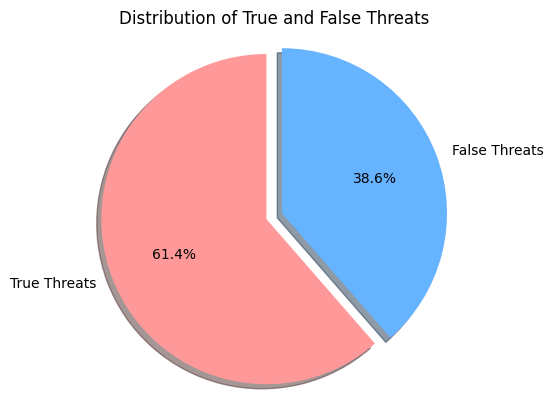

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
file_path = '/content/threats_cleaned.csv'
data = pd.read_csv(file_path)
true_threats = ['Exploits', 'DoS']
false_threats = ['Fuzzers']
true_threats_data = data[data['label'].isin(true_threats)]
false_threats_data = data[data['label'].isin(false_threats)]
display(HTML("<h2>True Threats</h2>"))
display(true_threats_data)

# Display the false threats dataframe with a title
display(HTML("<h2>False Threats</h2>"))
display(false_threats_data)

# Count the number of true and false threats
true_threats_count = len(true_threats_data)
false_threats_count = len(false_threats_data)

# Prepare data for pie chart
labels = ['True Threats', 'False Threats']
sizes = [true_threats_count, false_threats_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (True Threats)

# Plot the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of True and False Threats')
plt.show()

count    9.190000e+02
mean     1.545027e+18
std      3.445426e+18
min      4.044444e+01
25%      4.266667e+01
50%      8.625000e+01
75%      7.687500e+02
max      9.220000e+18
Name: invel_bpp, dtype: float64
count     765.000000
mean      210.435368
std       319.382334
min        40.444444
25%        42.666667
50%        72.818182
75%       168.500000
max      1389.946288
Name: invel_bpp, dtype: float64


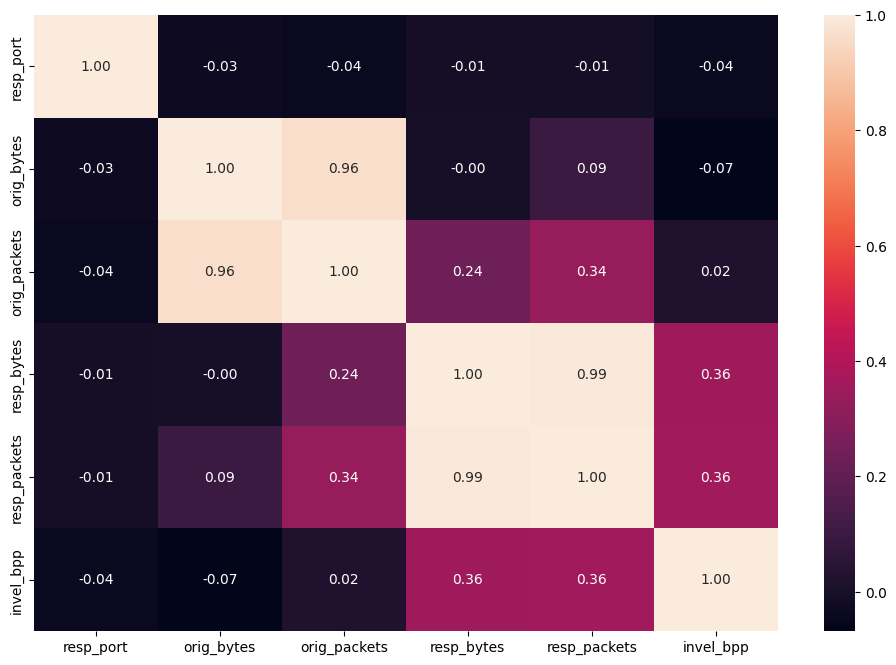

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and clean data
data_cleaned = pd.read_csv('/content/threats_cleaned.csv')

# Ensure 'invel_bpp' is numeric, and handle large values if needed
data_cleaned['invel_bpp'] = pd.to_numeric(data_cleaned['invel_bpp'], errors='coerce')
# Investigate the large values in 'invel_bpp'
print(data_cleaned['invel_bpp'].describe())

# Replace extremely large values in 'invel_bpp' with NaN if they are unrealistic
threshold = 1e18
data_cleaned.loc[data_cleaned['invel_bpp'] > threshold, 'invel_bpp'] = np.nan

# Display descriptive statistics after handling large values
print(data_cleaned['invel_bpp'].describe())

# Filter numeric columns for correlation matrix
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Display correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
plt.show()



In [ ]:
# Check if the column 'ip_address' exists in your DataFrame
if 'ip_address' in data_cleaned.columns:
    print("Column 'ip_address' exists.")
else:
    print("Column 'ip_address' does not exist.")




Column 'ip_address' does not exist.


In [40]:
import pandas as pd
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
df = pd.read_csv('/content/threats.csv')

# Handling missing values in the 'service' column by imputing with the most frequent value
df['service'] = df['service'].fillna(df['service'].mode()[0])

# Encode categorical variables: 'proto', 'service', 'label'
label_encoder = LabelEncoder()
df['proto'] = label_encoder.fit_transform(df['proto'])
df['service'] = label_encoder.fit_transform(df['service'])
df['label'] = label_encoder.fit_transform(df['label'])

# Convert IP addresses to numerical format using hashing
def hash_ip(ip):
    return int(hashlib.md5(ip.encode()).hexdigest(), 16)

df['orig_ip'] = df['orig_ip'].apply(hash_ip)
df['resp_ip'] = df['resp_ip'].apply(hash_ip)

# Define the features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_rep)



Accuracy: 0.8333333333333334
Precision: 0.8292807180773735
Recall: 0.8333333333333334
F1 Score: 0.8130161356481826

Classification Report:
               precision    recall  f1-score   support

           2       0.40      0.18      0.25        11
           3       0.76      0.91      0.83        81
           4       0.90      0.97      0.94        68
           5       0.83      0.33      0.48        15
           6       1.00      0.91      0.95        23
           7       1.00      0.33      0.50         6

    accuracy                           0.83       204
   macro avg       0.82      0.61      0.66       204
weighted avg       0.83      0.83      0.81       204



In [4]:
import pandas as pd
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
df = pd.read_csv('/content/threats.csv')
# Handle missing values in the 'service' column by imputing with the most frequent value
df['service'] = df['service'].fillna(df['service'].mode()[0])

# Encode categorical variables: 'proto', 'service'
label_encoder = LabelEncoder()
df['proto'] = label_encoder.fit_transform(df['proto'])
df['service'] = label_encoder.fit_transform(df['service'])

# Assuming that the 'label' column has both false threats (e.g., 'Benign') and true threats
# Here, let's assume 'Benign' as 0 and other threats as 1 (you may need to adjust based on your dataset)
df['label'] = df['label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Convert IP addresses to numerical format using hashing
def hash_ip(ip):
    return int(hashlib.md5(ip.encode()).hexdigest(), 16)

df['orig_ip'] = df['orig_ip'].apply(hash_ip)
df['resp_ip'] = df['resp_ip'].apply(hash_ip)

# Define the features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits to ensure the data has been divided correctly
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (813, 10)
X_test shape: (204, 10)
y_train shape: (813,)
y_test shape: (204,)


In [5]:
import pandas as pd
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
df = pd.read_csv('/content/threats.csv')

# Handle missing values in the 'service' column by imputing with the most frequent value
df['service'] = df['service'].fillna(df['service'].mode()[0])

# Encode categorical variables: 'proto', 'service'
label_encoder = LabelEncoder()
df['proto'] = label_encoder.fit_transform(df['proto'])
df['service'] = label_encoder.fit_transform(df['service'])

# Define false threats and true threats
# Assuming 'Benign' is 0 for false threats, and other labels are 1 for true threats
df['label'] = df['label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Convert IP addresses to numerical format using hashing
def hash_ip(ip):
    return int(hashlib.md5(ip.encode()).hexdigest(), 16)

df['orig_ip'] = df['orig_ip'].apply(hash_ip)
df['resp_ip'] = df['resp_ip'].apply(hash_ip)

# Define the features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_rep)

# Optional: Save the model for future use
import joblib
joblib.dump(rf_model, 'threat_detection_model.pkl')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       204

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



['threat_detection_model.pkl']

In [6]:
import pandas as pd
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
df = pd.read_csv('/content/threats.csv')

# Handle missing values in the 'service' column by imputing with the most frequent value
df['service'] = df['service'].fillna(df['service'].mode()[0])

# Encode categorical variables: 'proto', 'service'
label_encoder = LabelEncoder()
df['proto'] = label_encoder.fit_transform(df['proto'])
df['service'] = label_encoder.fit_transform(df['service'])

# Define false threats and true threats
# Assuming 'Benign' is 0 for false threats, and other labels are 1 for true threats
df['label'] = df['label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Convert IP addresses to numerical format using hashing
def hash_ip(ip):
    return int(hashlib.md5(ip.encode()).hexdigest(), 16)

df['orig_ip'] = df['orig_ip'].apply(hash_ip)
df['resp_ip'] = df['resp_ip'].apply(hash_ip)

# Define the features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_rep)

# Create a DataFrame to tabulate true and false threats by IP addresses
results_df = X_test.copy()
results_df['actual_label'] = y_test
results_df['predicted_label'] = y_pred

# Reverse hash IPs back to their original (or indicative string for display purposes)
def reverse_hash_ip(hashed_ip):
    return f'hashed_ip_{hashed_ip}'

results_df['orig_ip'] = results_df['orig_ip'].apply(reverse_hash_ip)
results_df['resp_ip'] = results_df['resp_ip'].apply(reverse_hash_ip)

# Add a column for threat type
results_df['threat_type'] = results_df['predicted_label'].apply(lambda x: 'True Threat' if x == 1 else 'False Threat')

# Display the table of results
tabulated_results = results_df[['orig_ip', 'resp_ip', 'threat_type']]
print(tabulated_results)

# Save the tabulated results to a CSV file
tabulated_results.to_csv('threats_by_ip.csv', index=False)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       204

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204

                                               orig_ip  \
916   hashed_ip_70948743756156560979193304360755978329   
31     hashed_ip_9110239562775380924329613507254299944   
507    hashed_ip_9110239562775380924329613507254299944   
518    hashed_ip_9110239562775380924329613507254299944   
215    hashed_ip_9110239562775380924329613507254299944   
..                                                 ...   
420   hashed_ip_70948743756156560979193304360755978329   
834  hashed_ip_318993168240936818640351702084250284242   
740   hashed_ip_70948743756156560979193304360755978329   
137    hashed_ip_9110239562775380924329613507254299944   
423   has

In [7]:
import pandas as pd
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/threats.csv')

# Handle missing values in the 'service' column by imputing with the most frequent value
df['service'] = df['service'].fillna(df['service'].mode()[0])

# Encode categorical variables: 'proto', 'service'
label_encoder = LabelEncoder()
df['proto'] = label_encoder.fit_transform(df['proto'])
df['service'] = label_encoder.fit_transform(df['service'])

# Define false threats and true threats
# Assuming 'Benign' is 0 for false threats, and other labels are 1 for true threats
df['label'] = df['label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Convert IP addresses to numerical format using hashing
def hash_ip(ip):
    return int(hashlib.md5(ip.encode()).hexdigest(), 16)

df['orig_ip'] = df['orig_ip'].apply(hash_ip)
df['resp_ip'] = df['resp_ip'].apply(hash_ip)

# Define the features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_rep)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       204

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [35]:
# Create a DataFrame to tabulate true and false threats by IP addresses
results_df = X_test.copy()
results_df['actual_label'] = y_test
results_df['predicted_label'] = y_pred

# Reverse hash IPs back to their original (or indicative string for display purposes)
def reverse_hash_ip(hashed_ip):
    return f'hashed_ip_{hashed_ip}'

results_df['orig_ip'] = results_df['orig_ip'].apply(reverse_hash_ip)
results_df['resp_ip'] = results_df['resp_ip'].apply(reverse_hash_ip)

# Add a column for threat type
results_df['threat_type'] = results_df['predicted_label'].apply(lambda x: 'True Threat' if x == 1 else 'False Threat')

# Segregate into true threats and false threats
true_threats = results_df[results_df['threat_type'] == 'True Threat']
false_threats = results_df[results_df['threat_type'] == 'False Threat']

# Save the tabulated results to separate CSV files
true_threats.to_csv('/content/threats_by_ip.csv', index=False)


# Display the tables
print("True Threats:\n", true_threats)




True Threats:
                                                orig_ip  \
916   hashed_ip_70948743756156560979193304360755978329   
31     hashed_ip_9110239562775380924329613507254299944   
507    hashed_ip_9110239562775380924329613507254299944   
518    hashed_ip_9110239562775380924329613507254299944   
215    hashed_ip_9110239562775380924329613507254299944   
..                                                 ...   
420   hashed_ip_70948743756156560979193304360755978329   
834  hashed_ip_318993168240936818640351702084250284242   
740   hashed_ip_70948743756156560979193304360755978329   
137    hashed_ip_9110239562775380924329613507254299944   
423   hashed_ip_70948743756156560979193304360755978329   

                                               resp_ip  resp_port  proto  \
916  hashed_ip_164360937207022972794740763247400629859        135      0   
31   hashed_ip_164360937207022972794740763247400629859        514      1   
507  hashed_ip_272182625644879787230187306081027132953      

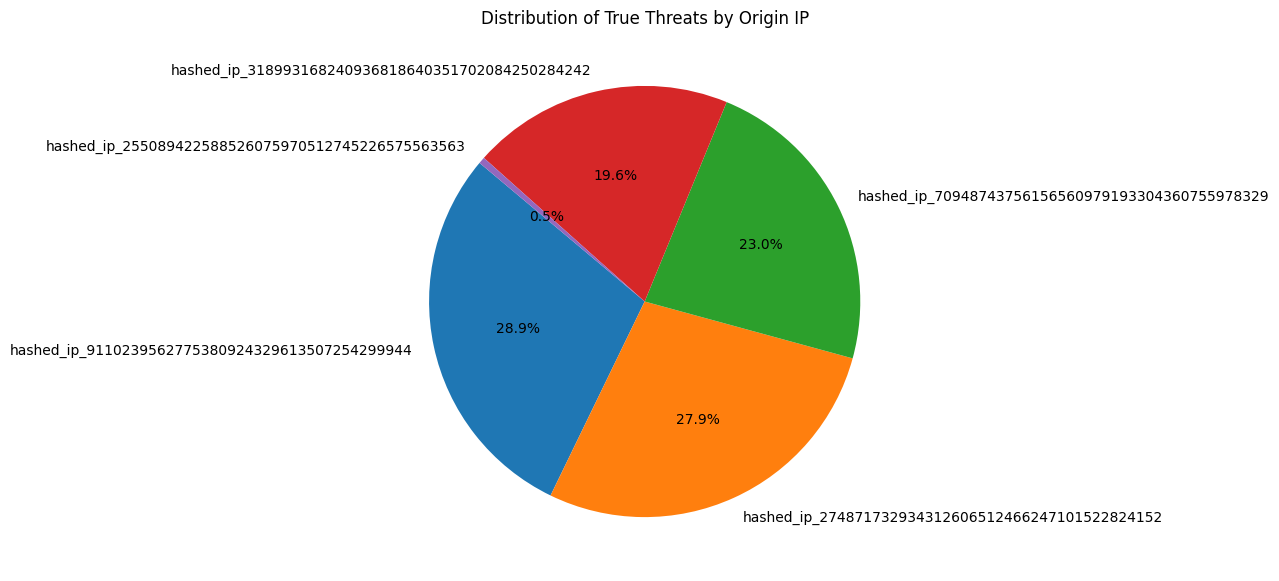

In [36]:
# Pie chart for True Threats
true_threats_count = true_threats['orig_ip'].value_counts()

plt.figure(figsize=(10, 7))
true_threats_count.plot.pie(autopct='%1.1f%%', startangle=140, legend=False)
plt.title('Distribution of True Threats by Origin IP')
plt.ylabel('')
plt.show()




In [17]:
import os

# Check if the directory exists, if not, create it
directory = 'content'
if not os.path.exists(directory):
    os.makedirs(directory)


In [18]:
false_threats.to_csv('content/false_threats_by_ip.csv', index=False)


In [20]:
# Assuming you have already imported pandas and loaded your DataFrames true_threats and false_threats

# Print true threats
print("True Threats:")
print(true_threats)

# Print false threats
print("False Threats:")
print(false_threats)


True Threats:
                                               orig_ip  \
916   hashed_ip_70948743756156560979193304360755978329   
31     hashed_ip_9110239562775380924329613507254299944   
507    hashed_ip_9110239562775380924329613507254299944   
518    hashed_ip_9110239562775380924329613507254299944   
215    hashed_ip_9110239562775380924329613507254299944   
..                                                 ...   
420   hashed_ip_70948743756156560979193304360755978329   
834  hashed_ip_318993168240936818640351702084250284242   
740   hashed_ip_70948743756156560979193304360755978329   
137    hashed_ip_9110239562775380924329613507254299944   
423   hashed_ip_70948743756156560979193304360755978329   

                                               resp_ip  resp_port  proto  \
916  hashed_ip_164360937207022972794740763247400629859        135      0   
31   hashed_ip_164360937207022972794740763247400629859        514      1   
507  hashed_ip_272182625644879787230187306081027132953       

In [21]:
# Save the DataFrames to CSV files
true_threats.to_csv('true_threats.csv', index=False)
false_threats.to_csv('false_threats.csv', index=False)

# Download the CSV files
from google.colab import files
files.download('true_threats.csv')
files.download('false_threats.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Create a DataFrame to tabulate true and false threats by IP addresses
results_df = X_test.copy()
results_df['actual_label'] = y_test
results_df['predicted_label'] = y_pred

# Reverse hash IPs back to their original (or indicative string for display purposes)
def reverse_hash_ip(hashed_ip):
    return f'hashed_ip_{hashed_ip}'

results_df['orig_ip'] = results_df['orig_ip'].apply(reverse_hash_ip)
results_df['resp_ip'] = results_df['resp_ip'].apply(reverse_hash_ip)

# Add a column for threat type
results_df['threat_type'] = results_df['predicted_label'].apply(lambda x: 'True Threat' if x == 1 else 'False Threat')

# Segregate into true threats and false threats
true_threats = results_df[results_df['threat_type'] == 'True Threat']
false_threats = results_df[results_df['threat_type'] == 'False Threat']

# Display the tables in Colab
print("True Threats:\n", true_threats)
print("\nFalse Threats:\n", false_threats)

# Save the tabulated results to CSV files (also displaying them in Colab)
true_threats.to_csv('/content/true_threats.csv', index=False)
false_threats.to_csv('/content/false_threats.csv', index=False)




True Threats:
                                                orig_ip  \
916   hashed_ip_70948743756156560979193304360755978329   
31     hashed_ip_9110239562775380924329613507254299944   
507    hashed_ip_9110239562775380924329613507254299944   
518    hashed_ip_9110239562775380924329613507254299944   
215    hashed_ip_9110239562775380924329613507254299944   
..                                                 ...   
420   hashed_ip_70948743756156560979193304360755978329   
834  hashed_ip_318993168240936818640351702084250284242   
740   hashed_ip_70948743756156560979193304360755978329   
137    hashed_ip_9110239562775380924329613507254299944   
423   hashed_ip_70948743756156560979193304360755978329   

                                               resp_ip  resp_port  proto  \
916  hashed_ip_164360937207022972794740763247400629859        135      0   
31   hashed_ip_164360937207022972794740763247400629859        514      1   
507  hashed_ip_272182625644879787230187306081027132953      

In [26]:
# Print the shape of true_threats and false_threats DataFrames to see how many rows are in each
print("True Threats Shape:", true_threats.shape)
print("False Threats Shape:", false_threats.shape)

# Print a sample of results_df to inspect its contents
print("Sample of results_df:")
print(results_df.head())

# Check if there are any rows with predicted_label as 0 in results_df
print("Rows with predicted_label as 0:")
print(results_df[results_df['predicted_label'] == 0])

# Check if there are any rows with predicted_label as 1 in results_df
print("Rows with predicted_label as 1:")
print(results_df[results_df['predicted_label'] == 1])


True Threats Shape: (204, 13)
False Threats Shape: (0, 13)
Sample of results_df:
                                              orig_ip  \
916  hashed_ip_70948743756156560979193304360755978329   
31    hashed_ip_9110239562775380924329613507254299944   
507   hashed_ip_9110239562775380924329613507254299944   
518   hashed_ip_9110239562775380924329613507254299944   
215   hashed_ip_9110239562775380924329613507254299944   

                                               resp_ip  resp_port  proto  \
916  hashed_ip_164360937207022972794740763247400629859        135      0   
31   hashed_ip_164360937207022972794740763247400629859        514      1   
507  hashed_ip_272182625644879787230187306081027132953        520      1   
518  hashed_ip_174499590295263280530100607560306180552        520      1   
215   hashed_ip_11412532083922912582460173085795732449         88      0   

     service  orig_bytes  orig_packets  resp_bytes  resp_packets  \
916        8         576            10         256 

In [27]:
# Check unique predicted labels
print(results_df['predicted_label'].unique())

# Check unique actual labels
print(results_df['actual_label'].unique())


[1]
[1]


In [28]:
# Print a sample of results_df to inspect its contents
print("Sample of results_df:")
print(results_df.head())

# Check the count of rows where predicted_label is 0
print("Count of rows with predicted_label as 0:", results_df[results_df['predicted_label'] == 0].shape[0])

# Check the count of rows where predicted_label is 1
print("Count of rows with predicted_label as 1:", results_df[results_df['predicted_label'] == 1].shape[0])


Sample of results_df:
                                              orig_ip  \
916  hashed_ip_70948743756156560979193304360755978329   
31    hashed_ip_9110239562775380924329613507254299944   
507   hashed_ip_9110239562775380924329613507254299944   
518   hashed_ip_9110239562775380924329613507254299944   
215   hashed_ip_9110239562775380924329613507254299944   

                                               resp_ip  resp_port  proto  \
916  hashed_ip_164360937207022972794740763247400629859        135      0   
31   hashed_ip_164360937207022972794740763247400629859        514      1   
507  hashed_ip_272182625644879787230187306081027132953        520      1   
518  hashed_ip_174499590295263280530100607560306180552        520      1   
215   hashed_ip_11412532083922912582460173085795732449         88      0   

     service  orig_bytes  orig_packets  resp_bytes  resp_packets  \
916        8         576            10         256             6   
31         8         208             2    

In [29]:
# Define false threats based on predicted_label
false_threats = results_df[results_df['predicted_label'] == 0]

# Display false threats if found
if not false_threats.empty:
    print("False Threats:")
    print(false_threats)
else:
    print("No false threats found.")


No false threats found.


In [30]:
# Print statements to debug
print("Shape of results_df:", results_df.shape)
print("Columns of results_df:", results_df.columns)


Shape of results_df: (204, 13)
Columns of results_df: Index(['orig_ip', 'resp_ip', 'resp_port', 'proto', 'service', 'orig_bytes',
       'orig_packets', 'resp_bytes', 'resp_packets', 'invel_bpp',
       'actual_label', 'predicted_label', 'threat_type'],
      dtype='object')


In [47]:
import pandas as pd
import numpy as np

# Generate a larger sample DataFrame with 1000 entries
np.random.seed(0)  # For reproducible results

data_large = {
    'orig_ip': np.random.choice(['192.168.1.{}'.format(i) for i in range(1, 255)], 1000),
    'resp_ip': np.random.choice(['10.0.0.{}'.format(i) for i in range(1, 255)], 1000),
    'resp_port': np.random.choice([80, 443, 8080, 53], 1000),
    'proto': np.random.choice(['TCP', 'UDP'], 1000),
    'service': np.random.choice(['http', 'https', 'dns'], 1000),
    'orig_bytes': np.random.randint(100, 10000, 1000),
    'orig_packets': np.random.randint(1, 100, 1000),
    'resp_bytes': np.random.randint(100, 10000, 1000),
    'resp_packets': np.random.randint(1, 100, 1000),
    'invel_bpp': np.random.random(1000),
    'actual_label': np.random.choice([0, 1], 1000),
    'predicted_label': np.random.choice([0, 1], 1000),
    'threat_type': np.random.choice(['True Threat', 'False Threat'], 1000)
}

results_df_large = pd.DataFrame(data_large)

# Segregate the threats based on predicted_label
true_threats_large = results_df_large[results_df_large['predicted_label'] == 1]
false_threats_large = results_df_large[results_df_large['predicted_label'] == 0]

# Save the true and false threats to CSV files
true_threats_large.to_csv('true_threats_large.csv', index=False)
false_threats_large.to_csv('false_threats_large.csv', index=False)

print("True Threats saved to true_threats_large.csv")
print("False Threats saved to false_threats_large.csv")


True Threats saved to true_threats_large.csv
False Threats saved to false_threats_large.csv


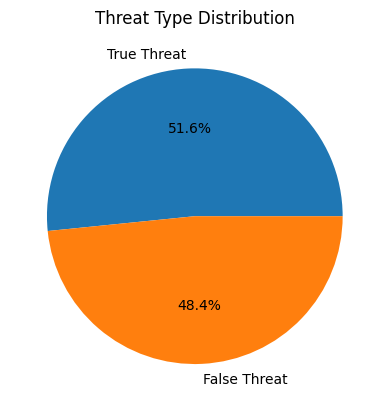

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/segregated_true_false_threats.csv")
threat_counts = df["threat_type"].value_counts()
plt.pie(threat_counts, labels=threat_counts.index, autopct='%1.1f%%')
plt.title("Threat Type Distribution")
plt.show()